# Yearly consumption and production patterns

An exploration of the yearly pattern of each customer, i.e. when daily data is aggregated (daily mean, min, max, quantiles...).

The objective is to find a "typical customer", that is one with
a "typical" consumption, and and "typical production" (e.g. no production gap).

Also, need to define statistical indices to quantify the degree of "typicalness":

* typical yearly pattern
* typical daily pattern, (yearly or for each season)
* absence of production gap


PH June 2017

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import solarhome as sh

In [3]:
df_raw = sh.read_csv('2011-2012')
df, missing_rec = sh.reshape(df_raw)

In [4]:
missing_rec

[(11, 'CL', 0),
 (12, 'CL', 0),
 (13, 'CL', 0),
 (16, 'CL', 0),
 (17, 'CL', 0),
 (20, 'CL', 0),
 (21, 'CL', 0),
 (22, 'CL', 0),
 (24, 'CL', 0),
 (25, 'CL', 0),
 (26, 'CL', 0),
 (27, 'CL', 9408),
 (28, 'CL', 0),
 (31, 'CL', 0),
 (32, 'CL', 0),
 (33, 'CL', 0),
 (34, 'CL', 0),
 (38, 'CL', 0),
 (40, 'CL', 0),
 (44, 'CL', 0),
 (45, 'CL', 0),
 (46, 'CL', 0),
 (47, 'CL', 0),
 (48, 'CL', 0),
 (50, 'CL', 0),
 (52, 'CL', 0),
 (55, 'CL', 0),
 (57, 'CL', 0),
 (58, 'CL', 0),
 (60, 'CL', 0),
 (62, 'CL', 0),
 (63, 'CL', 0),
 (67, 'CL', 0),
 (72, 'CL', 0),
 (74, 'CL', 0),
 (76, 'CL', 0),
 (78, 'CL', 0),
 (79, 'CL', 0),
 (80, 'CL', 0),
 (82, 'CL', 0),
 (83, 'CL', 0),
 (85, 'CL', 0),
 (86, 'CL', 0),
 (89, 'CL', 0),
 (90, 'CL', 0),
 (91, 'CL', 0),
 (92, 'CL', 0),
 (93, 'CL', 0),
 (97, 'CL', 0),
 (100, 'CL', 0),
 (101, 'CL', 0),
 (102, 'CL', 0),
 (103, 'CL', 0),
 (104, 'CL', 0),
 (106, 'CL', 0),
 (109, 'CL', 0),
 (111, 'CL', 0),
 (113, 'CL', 0),
 (114, 'CL', 0),
 (115, 'CL', 0),
 (116, 'CL', 0),
 (117, 'C

## Yearly pattern graph, for each customer

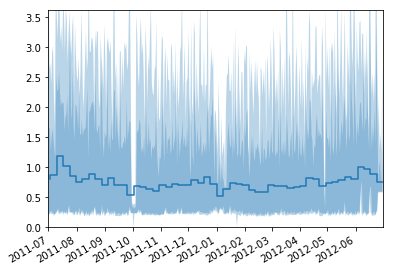

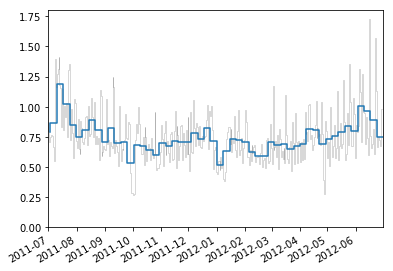

In [6]:
def plot_daily_stats(s, ax, with_envel=True, **plt_kwargs):
    '''plot stats (daily envelope and weekly mean) of Series `s`
    within axes `ax`
    '''
    d_m = s.resample('1D').mean()
    w_m = s.resample('1W').mean()
    
    if with_envel:
        d_min = s.resample('1D').min()
        d_q10 = s.resample('1D').apply(lambda x: x.quantile(0.10))
        d_q90 = s.resample('1D').apply(lambda x: x.quantile(0.90))
        d_max = s.resample('1D').max()
        
        ax.fill_between(d_min.index, d_min, d_max, alpha=0.3, lw=0, **plt_kwargs)
        ax.fill_between(d_min.index, d_q10, d_q90, alpha=0.3, lw=0, **plt_kwargs)
        
        ax.set_ylim(0, ymax=s.quantile(0.99)*1.2)
    else:
        ax.plot(d_m, lw=0.5, drawstyle='steps-pre', color='k', alpha=0.3)
        
        ax.set_ylim(ymin=0)
    
    #ax.plot(d_m, **plt_kwargs, alpha=0.5, lw=2)
    ax.plot(w_m, drawstyle='steps-pre', **plt_kwargs)
    
    ax.set_xlim(s.index[0], s.index[-1])
    
    plt.xticks(rotation=30, ha='right')

# Test
ax = plt.gca()
plot_daily_stats(df.loc[:,11]['GC'], ax, color='C0')

plt.figure()
ax = plt.gca()
plot_daily_stats(df.loc[:,11]['GC'], ax, with_envel=False, color='C0')

In [ ]:
def year_overview(c, with_envel=True):
    '''yearly overview of customer `c` with mean and enveloppe
    '''
    dfc = df.loc[:,c]
    
    cons = dfc['GC']
    prod = dfc['GG']
    
    if 'CL' not in dfc.columns:
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6,4))
        plot_daily_stats(cons, ax1, with_envel, color='C0')
        plot_daily_stats(prod, ax2, with_envel, color='C1')
        
        ax1.set_ylabel('load (kW)')
        ax2.set_ylabel('prod (kW)')
        
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6,5.5))
        plot_daily_stats(cons, ax1, with_envel, color='C0')
        plot_daily_stats(dfc['CL'], ax2, with_envel, color='C2')
        plot_daily_stats(prod, ax3, with_envel, color='C1')
        
        ax1.set_ylabel('load (kW)')
        ax2.set_ylabel('c. load (kW)')
        ax3.set_ylabel('prod (kW)')
    
    ax1.set_title('Customer {:d} in 2011-2012'.format(c))
    fig.tight_layout()

Test with a customer without controlled load

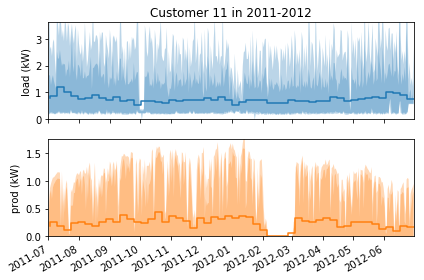

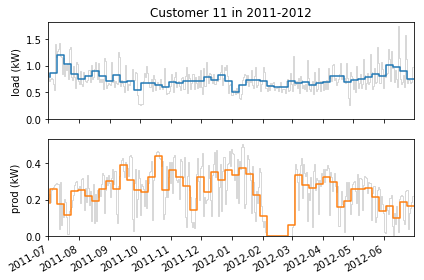

In [7]:
year_overview(11)
year_overview(11, with_envel=False)

Test with a customer wit controlled load

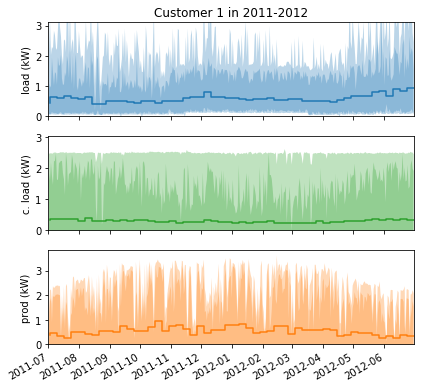

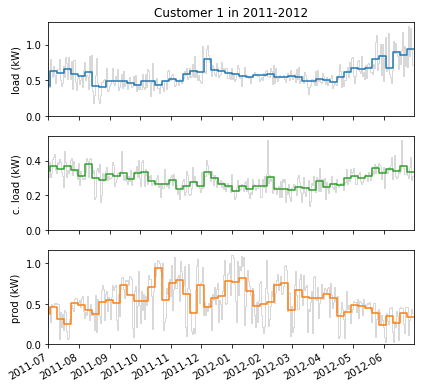

In [8]:
year_overview(1)
year_overview(1, with_envel=False)

Generate many plots in `Customer patterns` directory

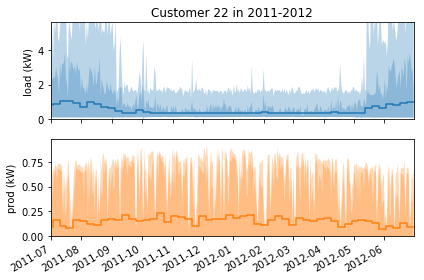

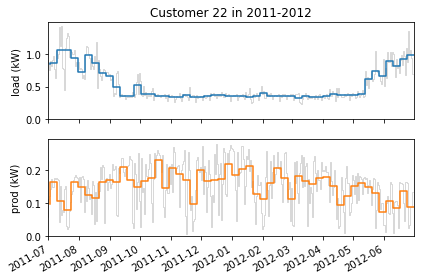

In [10]:
for c in [1, 2, 11, 12, 13, 16, 17, 20, 21, 22]:
    plt.close('all')
    
    year_overview(c)
    plt.savefig('Pattern yearly/Customer_envel_{}_2011-2012.png'.format(c), dpi=150)
    
    year_overview(c, with_envel=False)
    plt.savefig('Pattern yearly/Customer_{}_2011-2012.png'.format(c), dpi=150)

## Yearly pattern for all customers

after normalizing their channels.

## Yearly pattern indices

summer/winter consumtion ?

* winter: June, July (looking at the data for consumption increase)
* summer: November to February

In [25]:
winter = (df.index.month >= 6) & (df.index.month <= 7)
sum(winter)/48

61.0

In [26]:
summer = (df.index.month >= 11) | (df.index.month <= 2)
sum(summer)/48

121.0

In [9]:
df['2011-07':'2011-08']


Customer               1                    2                    3           \
Channel                 GC     GG     CL     GC     GG     CL     GC     GG   
2011-07-01 00:00:00  2.154  0.000  2.500  0.552  0.000  0.000  0.120  0.000   
2011-07-01 00:30:00  1.338  0.000  2.500  0.268  0.000  0.000  0.124  0.000   
2011-07-01 01:00:00  1.348  0.000  2.500  0.338  0.000  0.000  0.120  0.000   
2011-07-01 01:30:00  1.230  0.000  1.250  0.370  0.000  0.000  0.118  0.000   
2011-07-01 02:00:00  0.642  0.000  0.438  0.282  0.000  0.000  0.120  0.000   
2011-07-01 02:30:00  0.194  0.000  2.026  0.296  0.000  0.000  0.116  0.000   
2011-07-01 03:00:00  1.054  0.000  0.000  0.370  0.000  0.000  0.118  0.000   
2011-07-01 03:30:00  0.140  0.000  0.000  0.316  0.000  0.000  0.142  0.000   
2011-07-01 04:00:00  0.098  0.000  0.250  0.262  0.000  0.000  0.124  0.000   
2011-07-01 04:30:00  0.170  0.000  1.788  0.366  0.000  0.000  0.124  0.000   
2011-07-01 05:00:00  0.960  0.000  0.000  0.480  0.000  0.000  0.122  0.000   
2011-07-01 05:30:00  0.168  0.000  0.000  0.286  0.000  0.000  0.100  0.000   
2011-07-01 06:00:00  0.068  0.000  0.000  0.440  0.000  0.000  0.100  0.000   
2011-07-01 06:30:00  0.202  0.000  0.000  0.362  0.000  0.000  0.100  0.000   
2011-07-01 07:00:00  0.112  0.000  0.000  0.336  0.000  0.000  0.380  0.000   
2011-07-01 07:30:00  0.242  0.150  0.000  0.268  0.038  0.000  3.472  0.026   
2011-07-01 08:00:00  0.300  0.138  0.000  0.368  0.050  0.000  1.336  0.026   
2011-07-01 08:30:00  0.390  0.250  0.000  0.338  0.050  0.000  1.316  0.112   
2011-07-01 09:00:00  0.246  0.526  0.000  0.254  0.326  0.000  1.168  0.176   
2011-07-01 09:30:00  0.116  0.988  0.000  0.378  0.488  1.482  1.000  0.112   
2011-07-01 10:00:00  0.476  1.312  0.000  0.372  0.538  1.512  0.978  0.412   
2011-07-01 10:30:00  0.084  0.988  0.000  0.372  0.712  0.000  0.870  0.488   
2011-07-01 11:00:00  0.190  0.976  0.000  0.340  0.726  0.000  0.846  0.238   
2011-07-01 11:30:00  0.072  0.776  0.000  0.558  0.300  0.000  0.836  0.262   
2011-07-01 12:00:00  0.194  0.562  0.000  0.616  0.426  0.000  0.936  0.462   
2011-07-01 12:30:00  0.126  0.112  0.000  0.514  0.126  0.000  0.968  0.150   
2011-07-01 13:00:00  0.150  0.350  0.000  0.572  0.188  3.700  0.960  0.112   
2011-07-01 13:30:00  0.168  0.376  0.000  0.578  0.088  2.710  0.990  0.076   
2011-07-01 14:00:00  0.096  0.476  0.000  0.950  0.138  0.000  0.966  0.050   
2011-07-01 14:30:00  0.184  0.400  0.000  1.568  0.088  2.532  0.950  0.050   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
2011-08-31 09:00:00  0.254  1.476  0.000  0.198  1.038  0.000  0.124  0.612   
2011-08-31 09:30:00  0.544  1.700  0.000  0.434  0.812  0.000  0.100  0.726   
2011-08-31 10:00:00  0.356  2.450  0.000  0.308  0.350  0.000  0.174  0.600   
2011-08-31 10:30:00  0.138  2.762  0.000  0.378  0.188  0.000  0.236  0.476   
2011-08-31 11:00:00  0.208  1.650  0.000  0.228  0.750  0.000  0.318  0.788   
2011-08-31 11:30:00  0.144  2.126  0.000  0.310  0.400  0.000  0.322  0.650   
2011-08-31 12:00:00  0.158  0.726  0.000  0.242  1.076  0.000  0.236  0.712   
2011-08-31 12:30:00  0.172  0.662  0.000  0.210  1.200  0.000  0.256  0.688   
2011-08-31 13:00:00  0.146  2.662  0.000  0.302  0.762  0.000  0.150  0.662   
2011-08-31 13:30:00  0.180  2.638  0.000  0.284  0.988  0.000  0.120  0.612   
2011-08-31 14:00:00  0.552  2.438  0.000  0.204  0.888  0.000  0.106  0.512   
2011-08-31 14:30:00  0.212  1.788  0.000  0.264  0.738  0.000  0.102  0.438   
2011-08-31 15:00:00  0.080  1.450  0.000  0.298  0.562  0.000  0.102  0.326   
2011-08-31 15:30:00  0.282  0.862  0.000  0.244  0.376  0.000  0.106  0.200   
2011-08-31 16:00:00  0.098  0.600  0.000  0.204  0.200  0.000  0.186  0.088   
2011-08-31 16:30:00  0.232  0.288  0.000  0.300  0.038  0.000  0.148  0.026   
2011-08-31 17:00:00  0.110  0.076  0.000  0.376  0.012  0.000  0.156  0.012   
2011-08-31 17:30:00  0.386  0.000  0.000  0.686  0

In [13]:
df.index.month.unique()

Int64Index([7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6], dtype='int64')